# Quick-Start Guide for Assignment 1

The assignment details can be found at the end of this notebook. 

To complete the assignment, continue writing your code within this notebook. Once you've finished, download the notebook as a _.pynb_ file and submit it via itsLearning.

Feel free to delete any cells you don't need.

In [ ]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pkg_resources
import subprocess, sys

In [ ]:
def install(package):
    subprocess.run([sys.executable, "-m", "pip", "install", '--user', package])
installed_pkgs = '; '.join([str(p) for p in pkg_resources.working_set])
needed_pkgs = [
    "yfinance", 
    # "lxml"
]
pkg_resources.working_set
for pkg in needed_pkgs:
    if pkg not in installed_pkgs:
        install(pkg)

## <span style="color:red"> Restart the kernel after package installs </span>

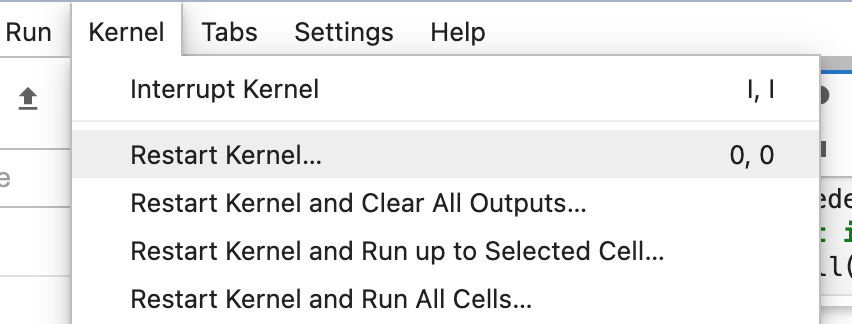

In [ ]:
# Let's see which python version is used in this environment
sp = subprocess.run([sys.executable, '--version'], capture_output=True)
print(sys.executable)
print(sp.stdout.strip().decode("utf-8"))

In [ ]:
# Now we can import yfinance (you may need to restart the kernel)
import yfinance as yf
import pandas as pd
from pathlib import Path

In [ ]:
# Let's define some useful constants
START = "2000-07-03"
END   = "2023-07-03"

TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMD', 'ANSS', 'APH', 'AVIFY', 'BA', 'BCE',  
           'CDNS', 'CGNX', 'CHKP', 'CSCO', 'CSGP', 'CTSH', 'DASTY', 
           'DTEGY', 'ERIC', 'FDS', 'FICO', 'GD', 'GE', 'GIB', 'GLW', 'HEI', 'HPQ', 'IBM', 'IFNNY', 
           'INFY', 'INTC', 'INTU', 'JKHY', 'KKPNY', 'KLAC', 'KYOCY', 'LHX', 'LMT', 'LOGI', 'LRCX', 'MCHP', 
           'MRVL', 'MSFT', 'MSI', 'MU', 'NICE', 'NOC', 'NOK', 'NTTYY', 'NVDA', 'ORAN', 'ORCL', 'OTEX', 
           'PAYX', 'PTC', 'QCOM', 'RCI', 'ROP', 'SAP', 'SCMWY', 'SFTBF', 'SKM', 'SNPS', 'STM', 'SWKS', 'T', 
           'TDY', 'TEF', 'TER', 'TLK', 'TRMB', 'TSM', 'TTDKY', 'TU', 'TXN', 'TYL', 'VIV', 'VOD', 
           'VRSN', 'VZ', 'WDC', 'ZBRA']

DATAFILE_NAME = "data.pickle"

# https://www.devdungeon.com/content/colorize-terminal-output-python
BOLD  = '\033[1m'
ULINE = '\033[4m'
BLUE  = '\033[34m'
RED   = '\033[31m'
RESET = '\033[0m'

In [ ]:
# How many?
display(len(TICKERS))

## You need to consult `pandas` documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html to complete this assignment

In [ ]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data = yf.download(tickers=TICKERS, start=START, end=END, group_by='ticker', auto_adjust=True)
    data.to_pickle(DATAFILE_NAME) # save localy

## How can you see your data in pandas?

In [ ]:
data.info()

In [ ]:
display(data.head(3))
display(data.tail(3))

In [ ]:
# You can restrict what you see:
display(data.loc['2022-05-05':'2022-05-07', (['PTC', 'AAPL'], ['Close','Volume'])])

In [ ]:
# Yes, there is print() function as well.
print ('from', data.index.min()) 
print ('to', data.index.max())

In [ ]:
# pick a date
date = pd.to_datetime('2019-05-20')
# variable date contains now an object of class Timestamp
print(f'type: {type(date).__name__} :: {date.day_name()}, {date.date()}')

In [ ]:
# Let's see how Apple closed at 20.5.2019
# Get the value in the row '2019-05-20' and the column ('AAPL', 'Close')
close_value = data.loc[date, ('AAPL', 'Close')]
print(f'{BOLD+BLUE}Close on {date.date()}:{RESET} {close_value:.4f}')
# on string formating see https://pyformat.info

In [ ]:
import matplotlib.pyplot as plt

# visualise a couple of time series and point out the value
series = [('AAPL','Close'), ('MSFT', 'Close')]
ax = data[series].plot(figsize=(15,5), grid=True)
ax.legend(['Apple', 'MS'])
show_value = data.loc[date, ('AAPL', 'Close')]
ax.plot([date], [show_value], marker='o', color='r')
# more on visualisetion with low-level control se https://matplotlib.org/users
# for making interactive plots se https://plotly.com/python/getting-started 
plt.show()

## Assignment
Now that you've read the Pandas documentation and have learned how to manipulate financial data, your task is to analyze the 84 downloaded stock datasets. Specifically, identify the stock that experienced the largest single-day High-Low price difference.

- What is the name of the company?
- On what date did this occur?
- What was the percentage difference of this daily High-Low fluctuation?

In [ ]:
# Your code goes here.
data

In [165]:


new_df = pd.series ({})

list_date = data.index.get_level_values('Date').unique()

start_date = data.index.date.min()
end_date =  data.index.date.max()

for tic in TICKERS:

    for date in list_date:
        temp = data.loc[date, (tic, ['High', 'Low'])]
        diff = temp.values[0] - temp.values[1]


    new_df = pd.concat([new_df, pd.DataFrame(rows_to_append)], ignore_index=True)




,Date,Company,High,Low,Diff
0,2000-07-03,AAPL,0.823219,0.790063,0.033156
1,2000-07-05,AAPL,0.836481,0.769222,0.067259
2,2000-07-06,AAPL,0.802378,0.752170,0.050208
3,2000-07-07,AAPL,0.830798,0.790063,0.040735
4,2000-07-10,AAPL,0.882900,0.814693,0.068208


In [172]:
new_df.head(50)
len(new_df)
new_df.index


#check= '2022.03.20'
#quick_check= new_df.loc(new_df['Company'])
#print(quick_check)

RangeIndex(start=0, stop=485940, step=1)

In [ ]:
tic = 'AAPL'


print(list_date)
high_low_diff = data.loc[list_date,(tic, ['High', 'Low'])]

print(high_low_diff)

In [167]:
l= len(data.index.date)
y= len(data.columns)

print(l,y)

x= len(TICKERS)
print(x)
cal= l * (y / x)

print(cal)

5785 420
84
28925.0


In [ ]:
for tic in TICKERS:
    for date in pd.date_range(start=start_date, end= end_date):
        if date in list_date:
            temp= data.loc[date, (tic, ['High','Low'])]
            diff= temp.values[0] - temp.values[1]
            new_df.loc[len(new_df)] = [date, tic, temp.values[0], temp.values[1], diff]


In [ ]:
len(new_df)

new_df.sample(frac=10, replace= True)